## Eigenvectors and values using numpy and scipy sparse matrices

In Python, two libraries are primarily used for all linear algebra: `numpy` and `scipy` (incl. `scipy.sparse`).
You are encouraged to look up the documentation on these when needed. Below are some examples.

In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as splinalg

In [2]:
# Shorthands
Inv = np.linalg.inv
Tr  = np.trace
MM  = np.matmul  

In [23]:
C6 = np.zeros((6, 6))
np.fill_diagonal(C6[1:], 1)
C6[0, -1] = 1
C6

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [31]:
# There are several different sparse matrices.
# They each have advantages and disadvantages.
# Constructing a matrix may be faster in eg. dok format, while linear algebra is often fastest with csr format.
# You should look up the documentation when you get to the point where you consider sparse matrices.
C6_sparse = sp.csr_matrix(C6)
C6_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (6, 6)>

### Visualize a sparse matrix

In [32]:
import matplotlib.pyplot as plt

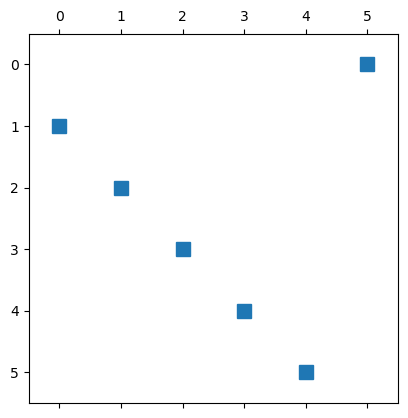

In [33]:
plt.spy(C6_sparse)

In [38]:
# Use numpy for dense linear algebra, scipy for sparse:
e, v = np.linalg.eig(C6)

# Sparse eigenvalue method requires that you ask for less than all eigenvalues.
# This is often fine when you have a giant matrix and want only the lowest ones
# (or the middle ones, or whatever -- can be specified)
# For smaller systems it is much faster to use the dense linear algebra anyway.
es, vs = splinalg.eigs(C6_sparse, k=4)

# Note that there are eigh / eigsh methods for the special case of a hermitian matrix -- it runs faster.

# Dense:
print(f"{e}")
print(v[:, 1])  # The second eigenvector

# Sparse:
print(es)
print(vs[:, 0])  # First eigenvector

# All states are normalized:
print(np.linalg.norm(v, axis=0))
print(np.linalg.norm(vs, axis=0))

[-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j  0.5+0.8660254j
  0.5-0.8660254j  1. +0.j       ]
[ 0.40824829+0.00000000e+00j -0.20412415-3.53553391e-01j
 -0.20412415+3.53553391e-01j  0.40824829-4.12223253e-17j
 -0.20412415-3.53553391e-01j -0.20412415+3.53553391e-01j]
[-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
[ 0.40824829+0.j -0.40824829+0.j  0.40824829+0.j -0.40824829+0.j
  0.40824829+0.j -0.40824829+0.j]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1.]


### Constructing the original matrix from the eigensystem

In [40]:
C6_1 = MM(MM(v,np.diag(e)),Inv(v))
np.max(np.abs(C6_1-C6))

np.float64(1.2215054755269978e-15)

In [41]:
C6_1 = MM(MM(v,np.diag(e)),v.T.conjugate())  ## getting back from eigensystem to orig. matrix
np.max(np.abs(C6_1-C6))

np.float64(9.992007221626409e-16)